# 2026 Pre-Season Testing 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils
from fastf1.utils import delta_time
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection
import matplotlib as mpl
from typing import Union
from matplotlib.colors import LinearSegmentedColormap
import warnings
import f1analytics as f1a
warnings.filterwarnings('ignore')

## Bahrain Test 2 — Day 3

In [2]:
# Load Bahrain Test 2, Day 1
session = fastf1.get_testing_session(2026, 2, 3)
session.load()

print(f'Session: {session.event["EventName"]} - {session.name}')
print(f'Loaded data for {len(session.drivers)} drivers')

req         WARNING 	DEFAULT CACHE ENABLED! (4.11 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for Pre-Season Testing - Practice 3 [v3.8.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '1'
core        WARNING 	Fixed incorrect tyre stint information for driver '3'
core        WARNING 	Fixed incorrect tyre stint information for driver '5'
core        WARNING 	Fixed incorrect tyre stint information for driver '6'
core        WARNING 	Fixed incorrect tyre stint information for driver '10'
core        WARNING 	No lap data for driver 

Session: Pre-Season Testing - Practice 3
Loaded data for 22 drivers


## Cross-Session Telemetry Comparison

In [3]:
session_name='Pre-Season Testing Day 6'
session_year=2026
session_type=''


t = f1a.Telemetry(
    session_name=session_name,
    year=session_year,
    session_type=session_type,
    session=session,
)

(<Figure size 1400x1400 with 5 Axes>,
 array([<Axes: ylabel='Speed (km/h)'>, <Axes: ylabel='Throttle (%)'>,
        <Axes: ylabel='Brake (%)'>, <Axes: ylabel='Δ Time (s)'>],
       dtype=object))

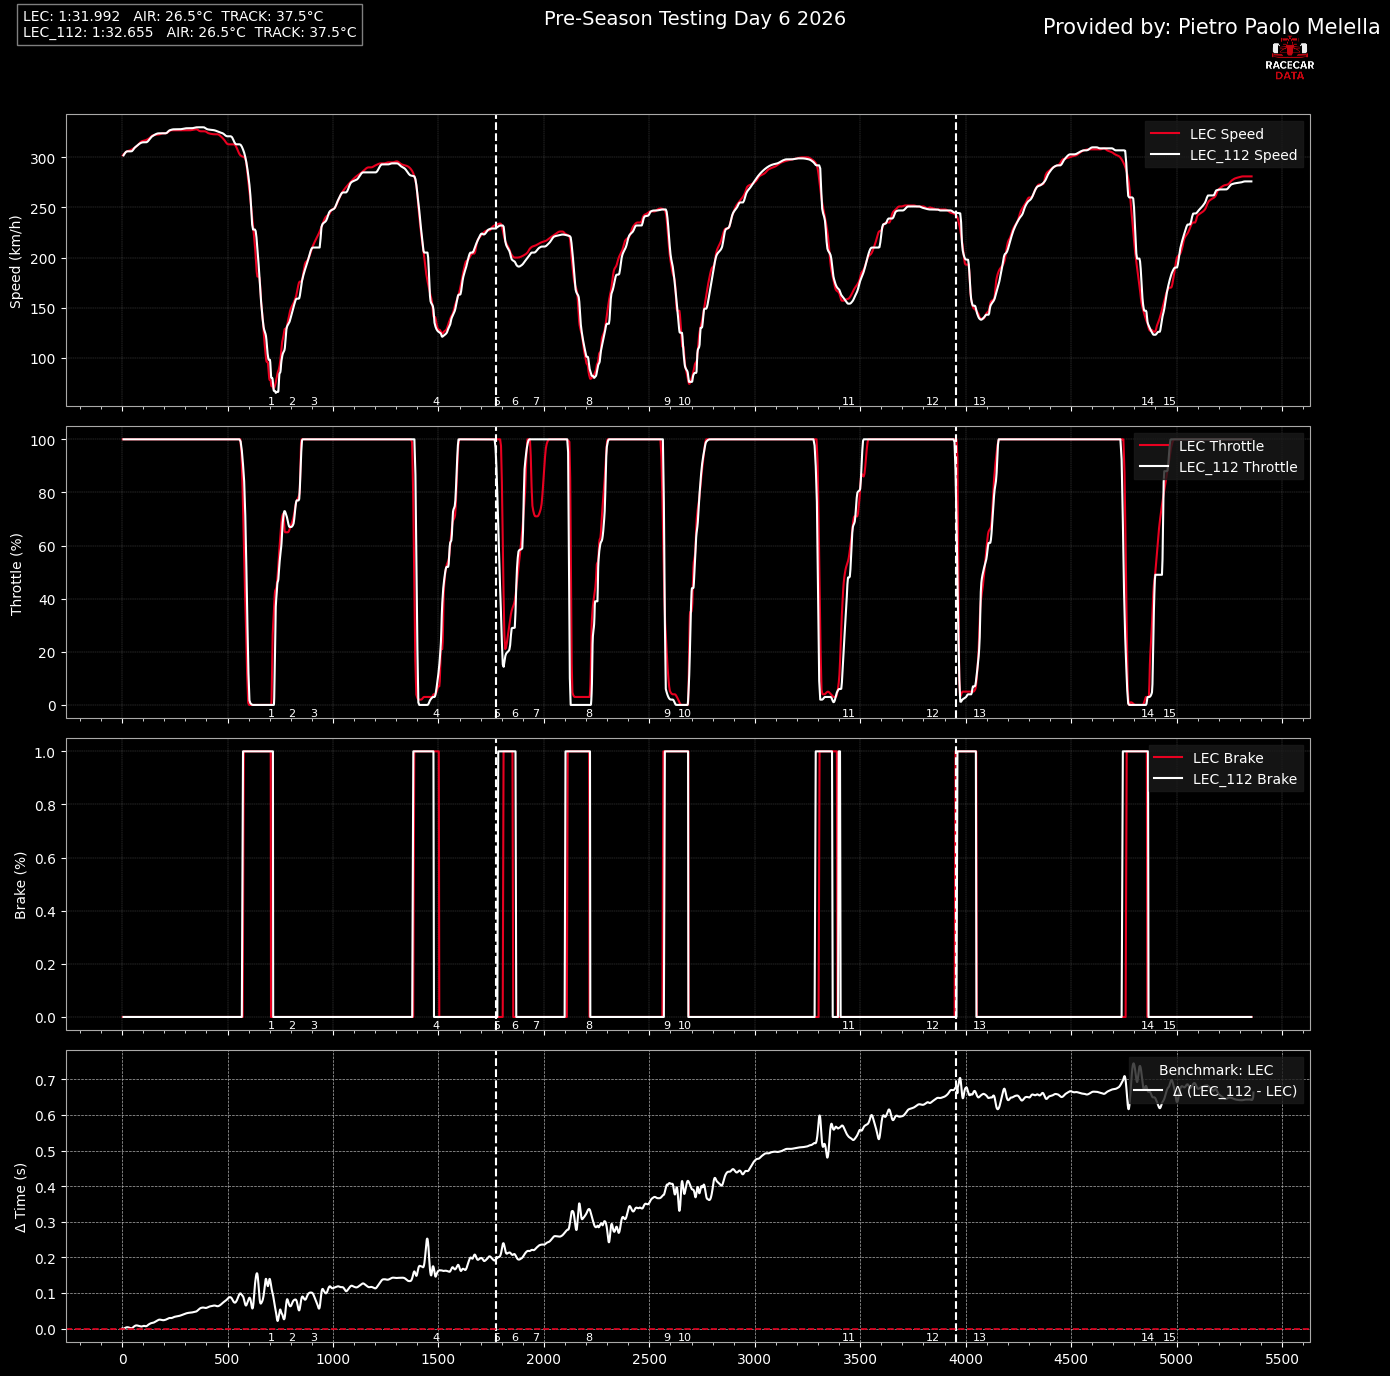

In [4]:
t.compare_laps(
    drivers={'LEC': ['fastest', '112']},
    channels=['Speed', 'Throttle', 'Brake','Delta'],
    session_label=session_type
)

(<Figure size 1400x1400 with 5 Axes>,
 array([<Axes: ylabel='Speed (km/h)'>, <Axes: ylabel='Throttle (%)'>,
        <Axes: ylabel='Brake (%)'>, <Axes: ylabel='Δ Time (s)'>],
       dtype=object))

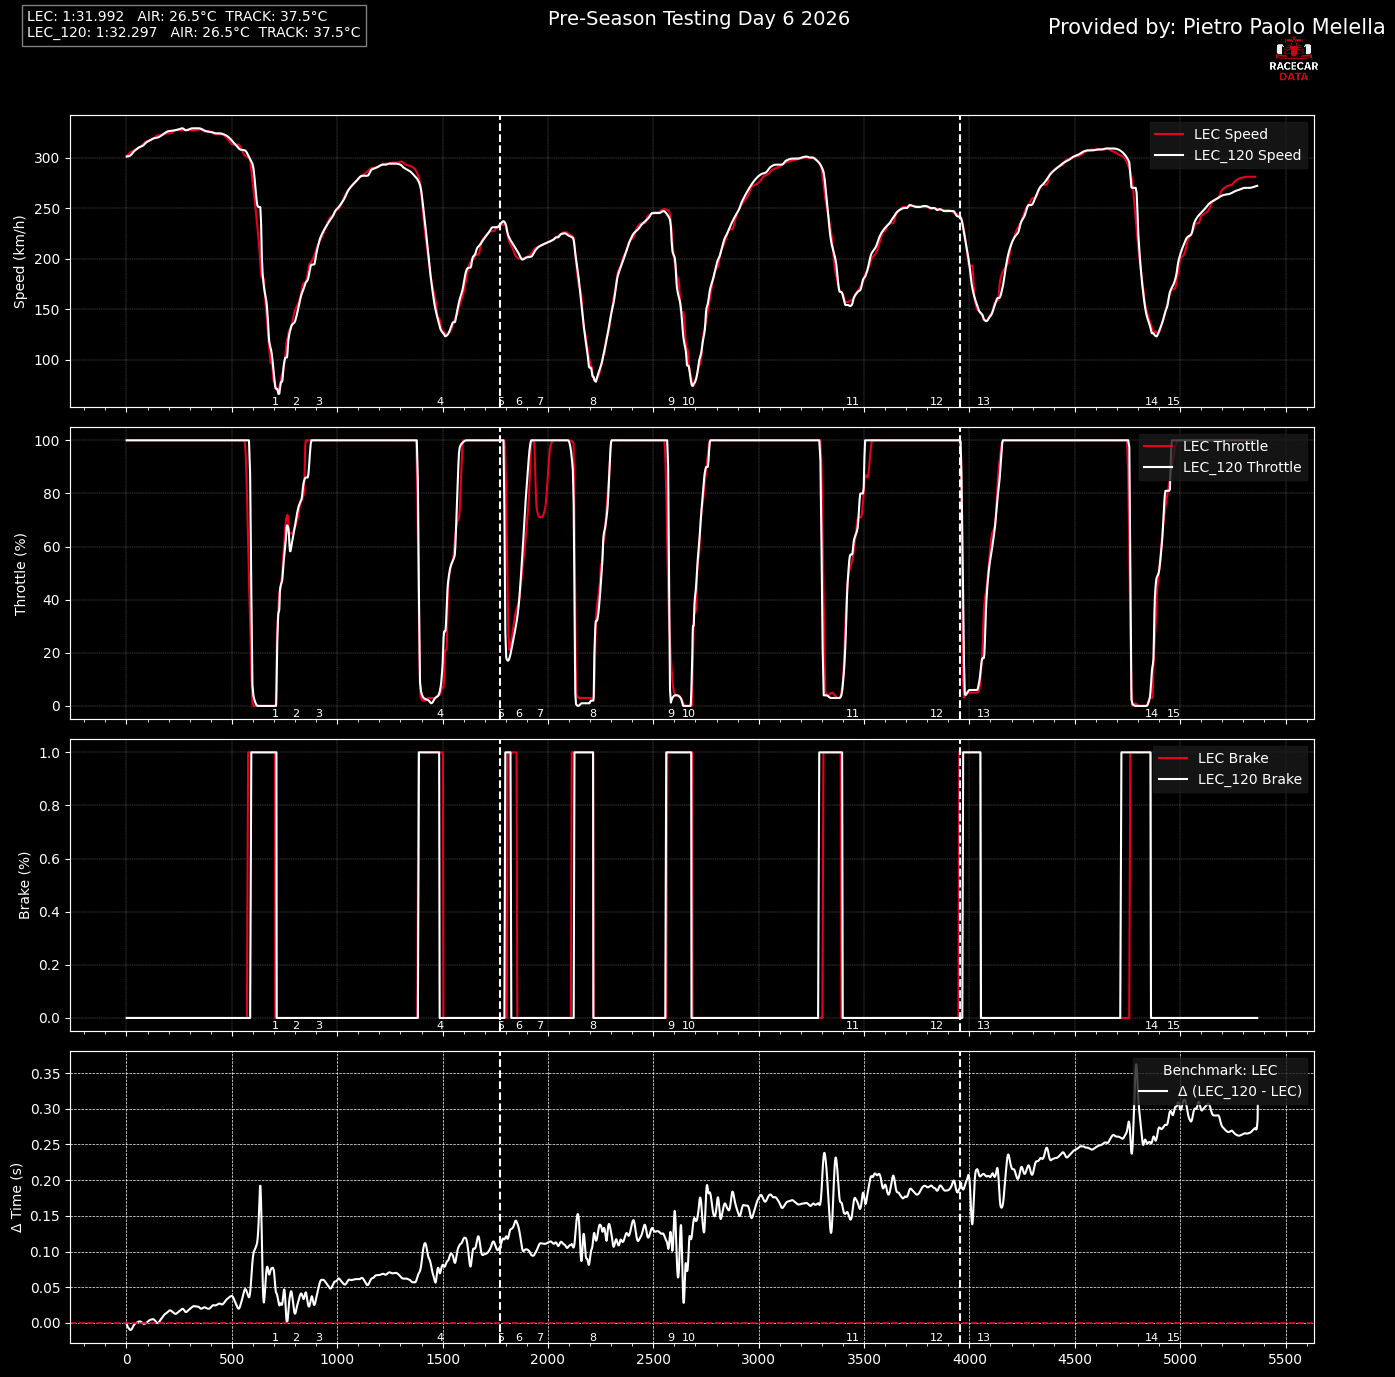

In [5]:
t.compare_laps(
    drivers={'LEC': ['fastest', '120']},
    channels=['Speed', 'Throttle', 'Brake','Delta'],
    session_label=session_type
)

(<Figure size 1400x1400 with 5 Axes>,
 array([<Axes: ylabel='Speed (km/h)'>, <Axes: ylabel='Throttle (%)'>,
        <Axes: ylabel='Brake (%)'>, <Axes: ylabel='Δ Time (s)'>],
       dtype=object))

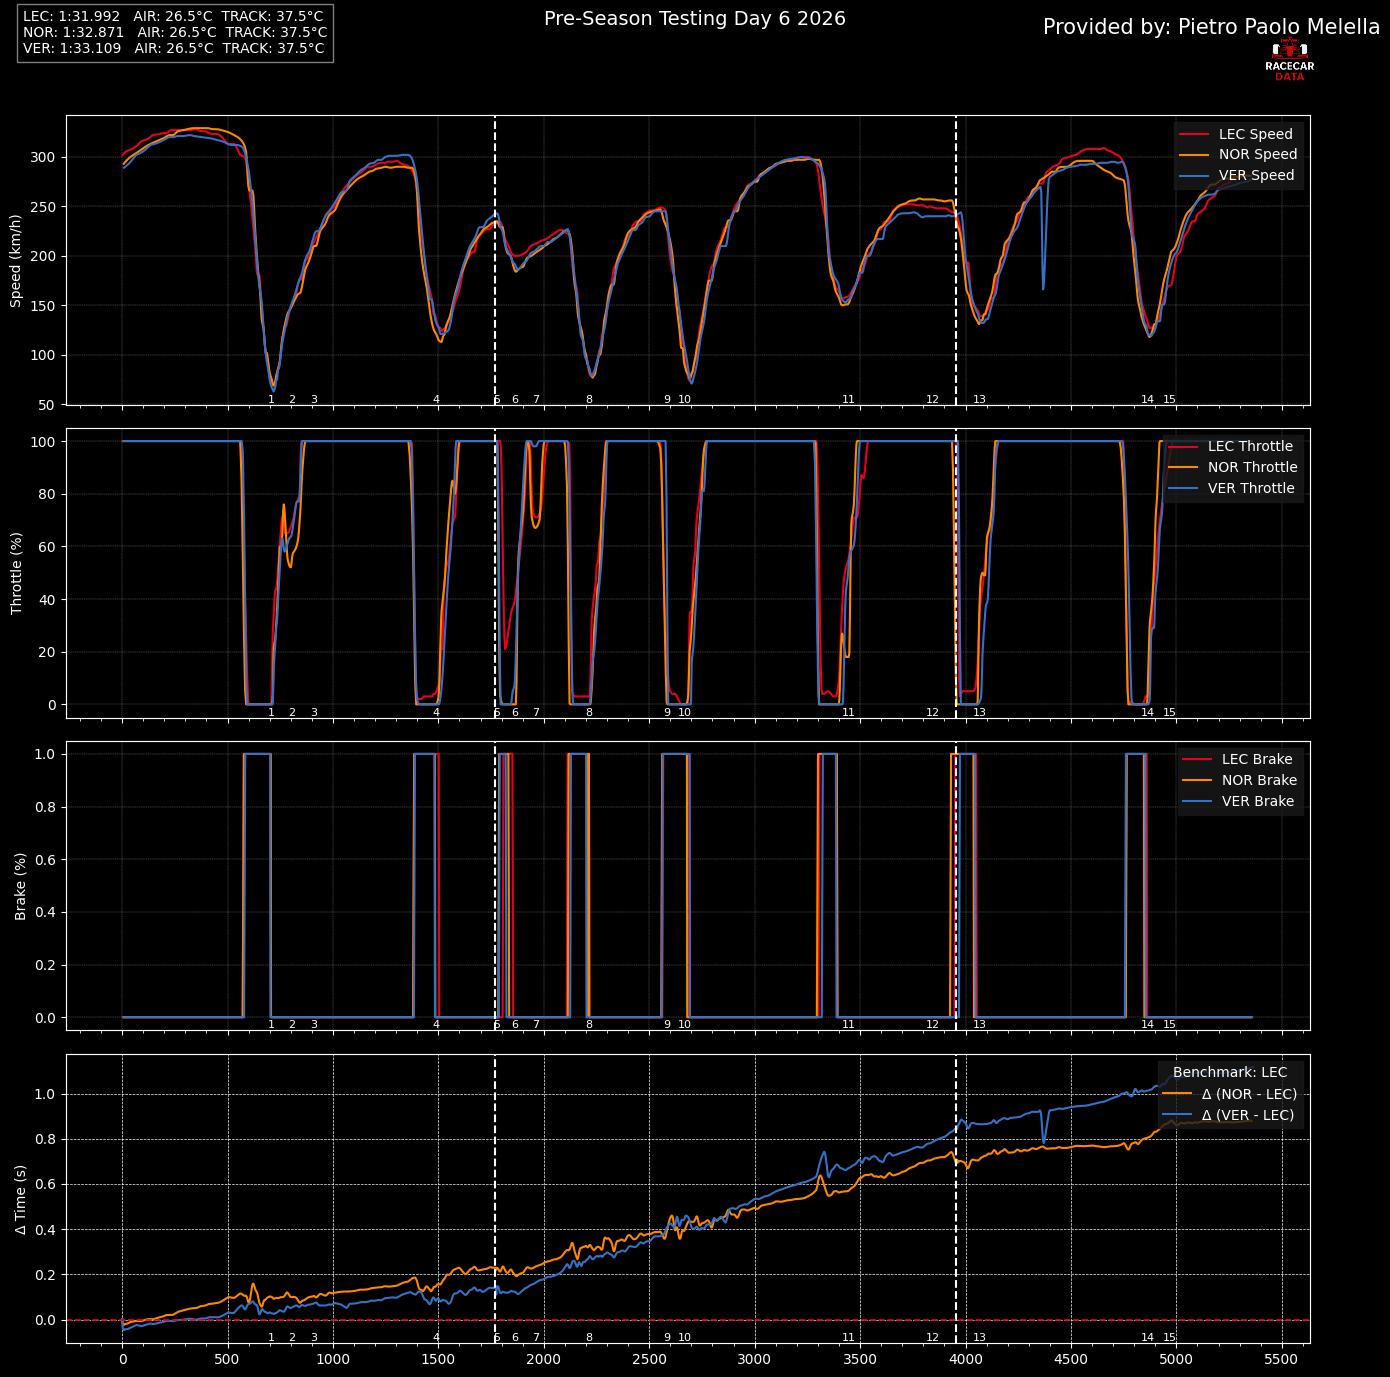

In [6]:
t.compare_laps(
    drivers={'LEC': 'fastest', 'NOR':'fastest', 'VER': 'fastest'},
    channels=['Speed', 'Throttle', 'Brake','Delta'],
    session_label=session_type
)

(<Figure size 1400x1400 with 5 Axes>,
 array([<Axes: ylabel='Speed (km/h)'>, <Axes: ylabel='Throttle (%)'>,
        <Axes: ylabel='Brake (%)'>, <Axes: ylabel='Long_Acc (g)'>],
       dtype=object))

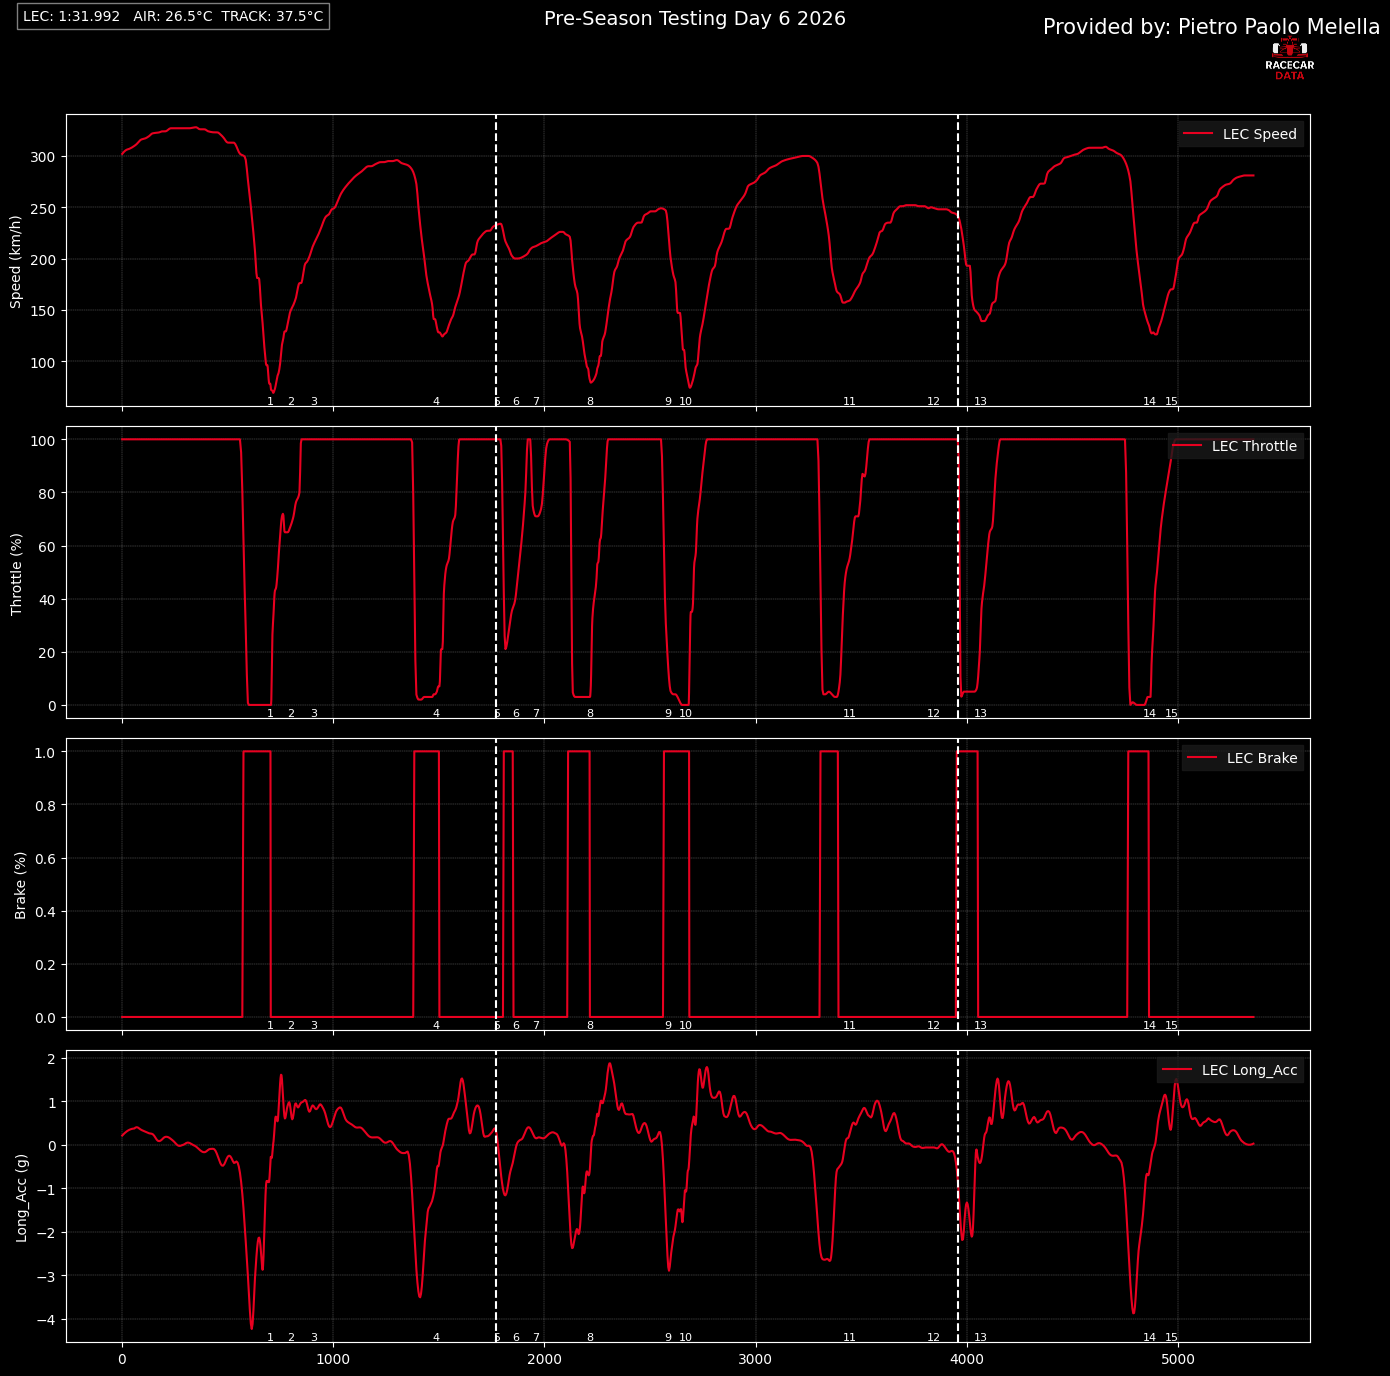

In [7]:
t.compare_laps(
    drivers={'LEC': 'fastest'},
    channels=['Speed', 'Throttle', 'Brake', 'Long_Acc', 'Delta'],
    session_label=session_type
)

(<Figure size 1800x1000 with 4 Axes>,
 array([<Axes: title={'center': 'Sector 1'}>,
        <Axes: title={'center': 'Sector 2'}>,
        <Axes: title={'center': 'Sector 3'}>], dtype=object))

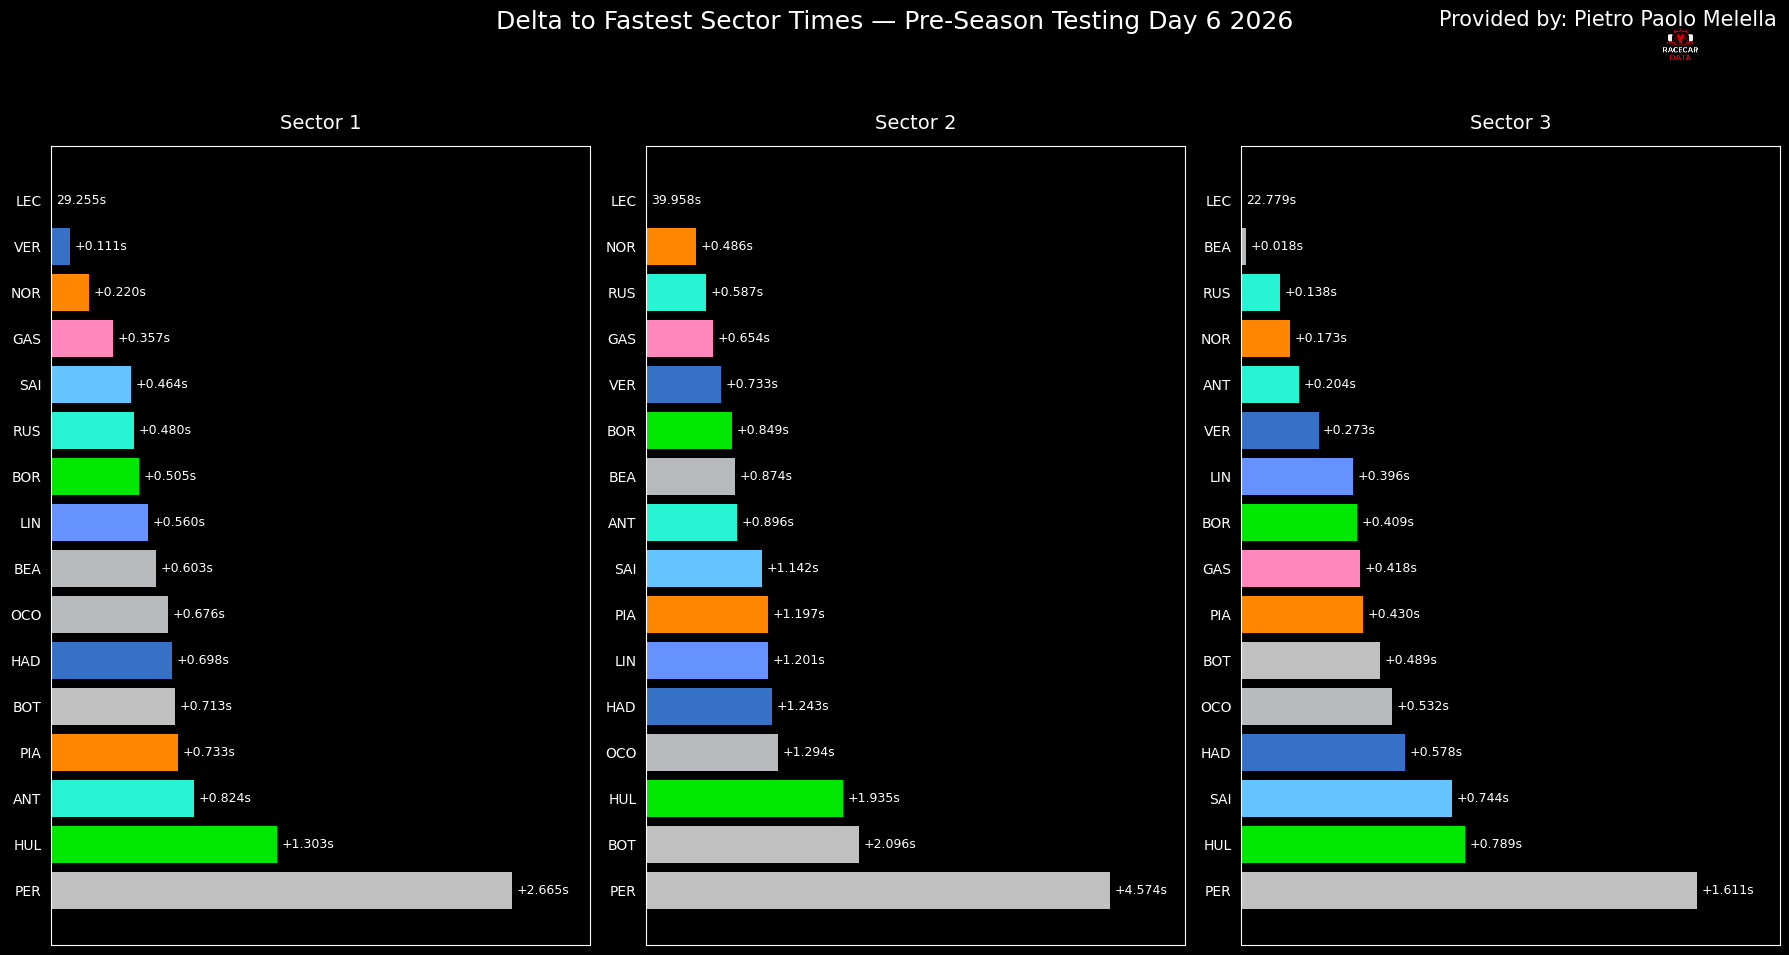

In [8]:
sd = f1a.SectorDeltaPlotter(
    session_name, session_year, session_type, session=session
)
sd.plot()

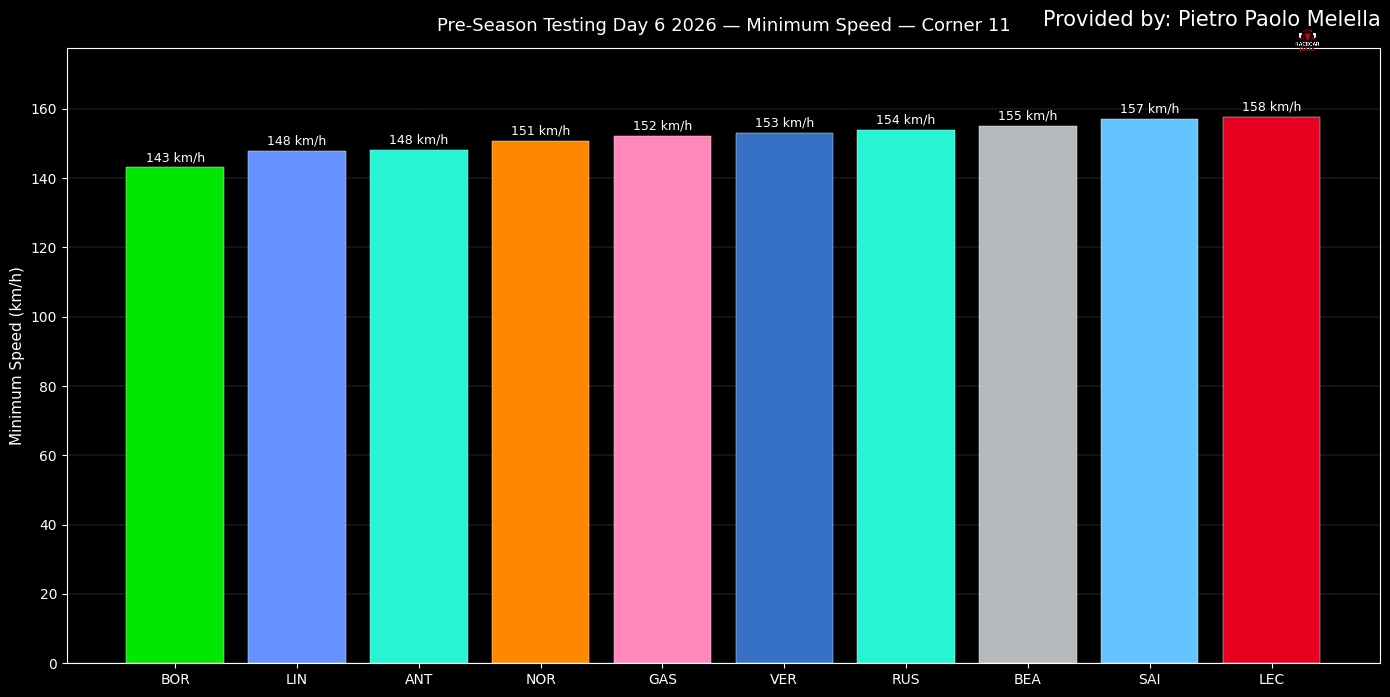

In [9]:
msc = f1a.CornerMinSpeed(
    session, session_name, session_year, session_type,
    corner_idxs=[11], after=20, before=20, n_drivers=10
).plot()

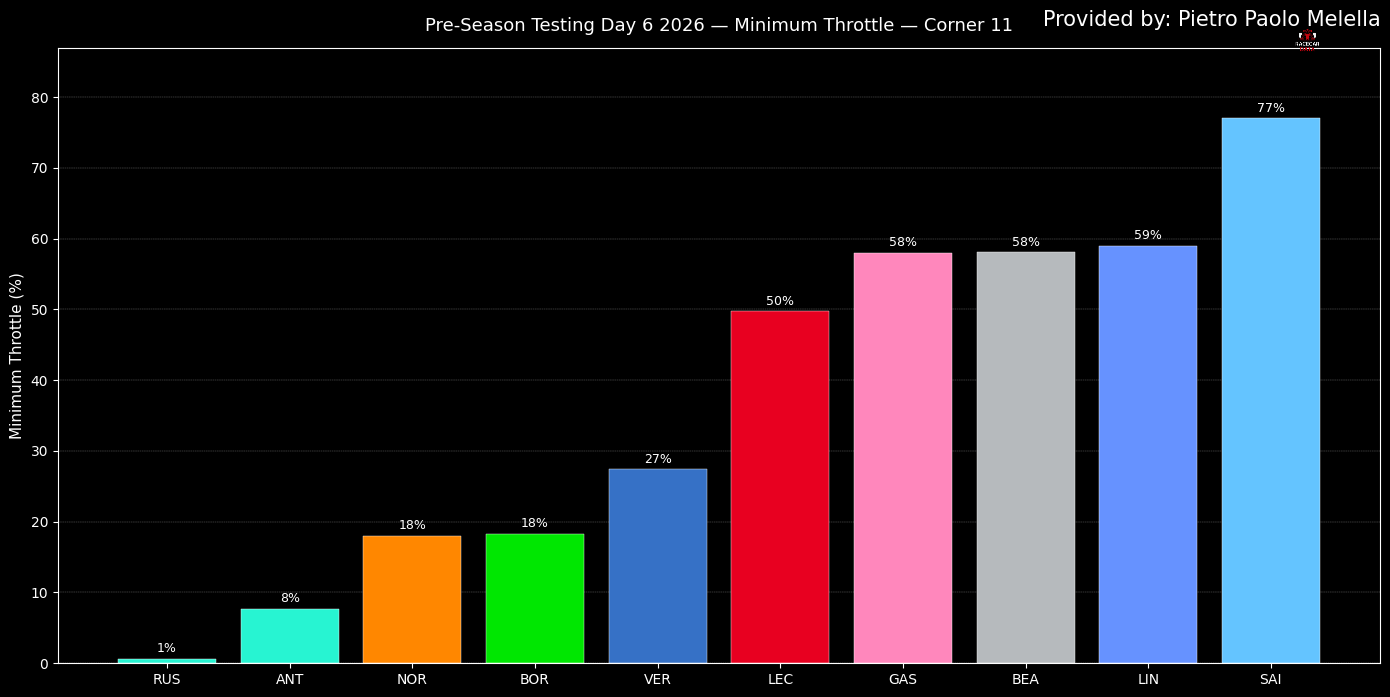

In [10]:
mtc = f1a.CornerMinThrottle(
    session, session_name, session_year, session_type,
    corner_idxs=[11], after=20, before=20, n_drivers=10
).plot()

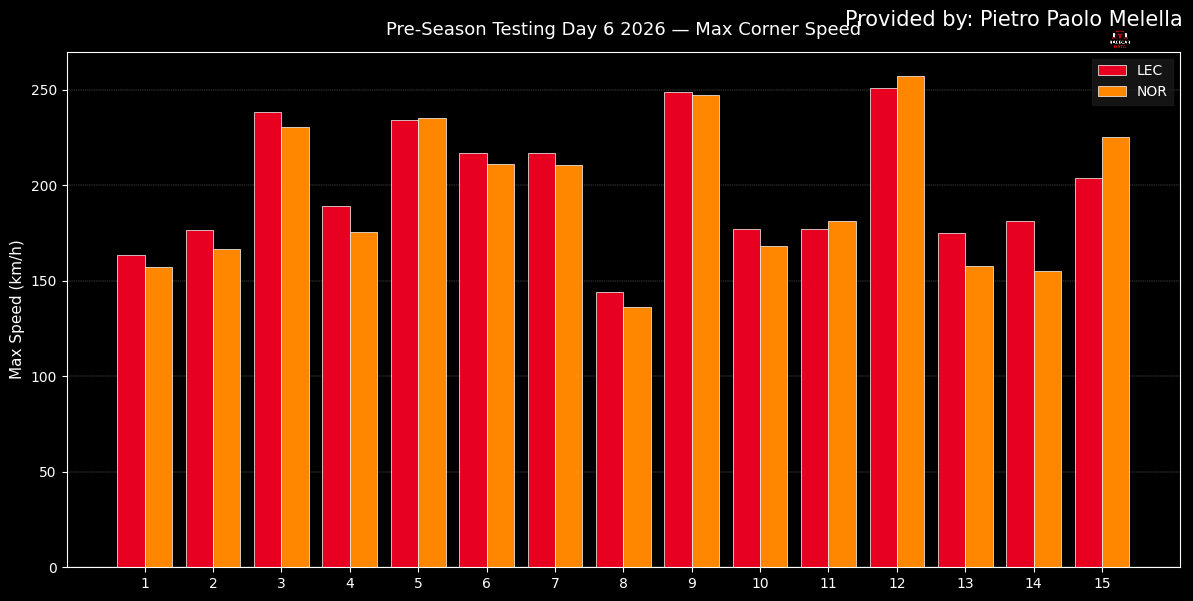

In [11]:
csc = f1a.CornerSpeedComparator(
    session_name=session_name,
    year=session_year,
    session_type=session_type,
    session=session,
    drivers={'LEC': 'fastest', 'NOR': 'fastest'},
    mode='max'
).plot_peak_speeds()

(<Figure size 1600x700 with 2 Axes>,
 <Axes: title={'center': 'Corner Time Deltas — Pre-Season Testing 2026 — fastest per corner\nLEC: 1:31.992  |  NOR: 1:32.871'}, xlabel='Turn', ylabel='Time Lost (s)'>)

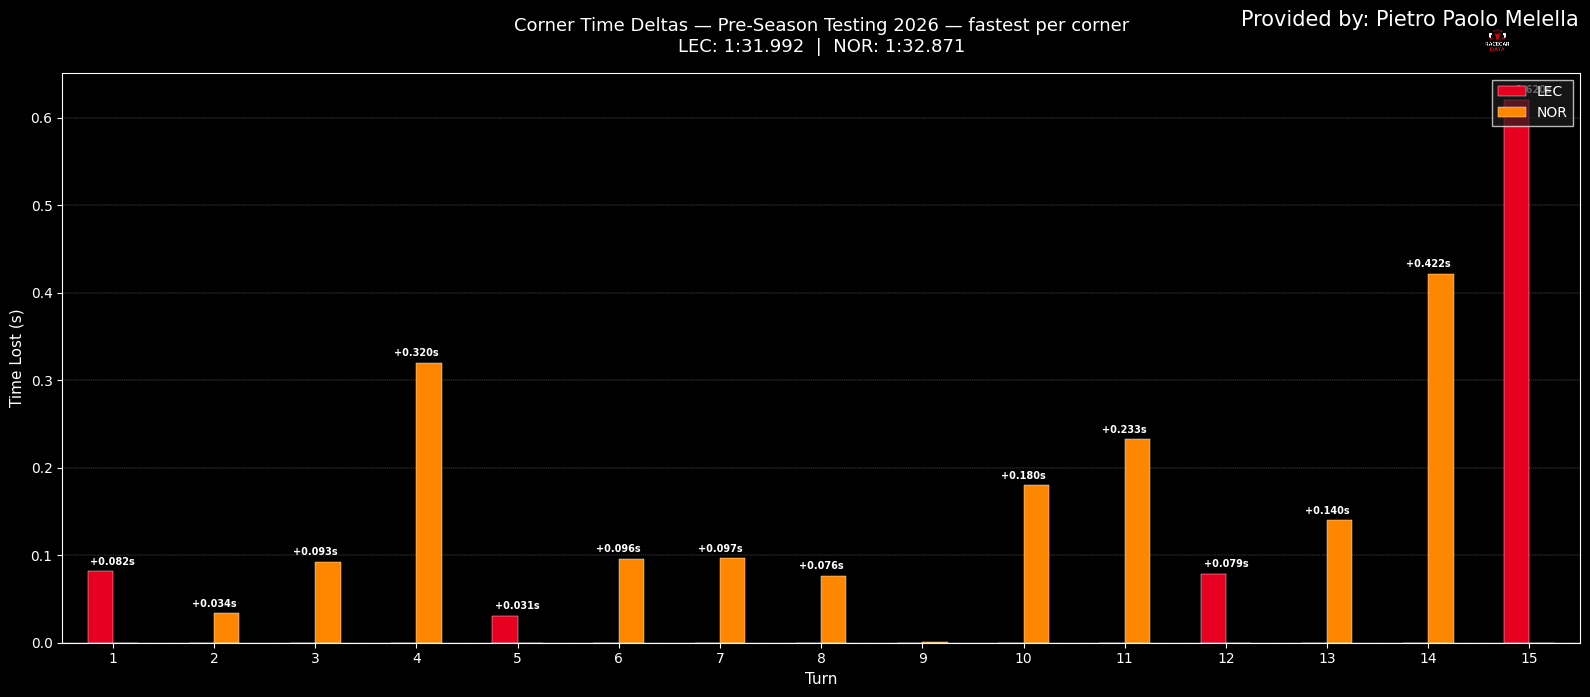

In [12]:
cmp = f1a.CornerTimeComparator(
    session_name=session_name,
    year=session_year,
    session_type=session_type,
    session=session,
    drivers=[('LEC', 'fastest'), ('NOR', 'fastest')],
)

cmp.plot_corner_time_deltas(baseline='per_corner_fastest')

(<Figure size 1400x1000 with 3 Axes>,
 <Axes: title={'center': 'Pre-Season Testing Day 6 2026 — LEC vs NOR'}>)

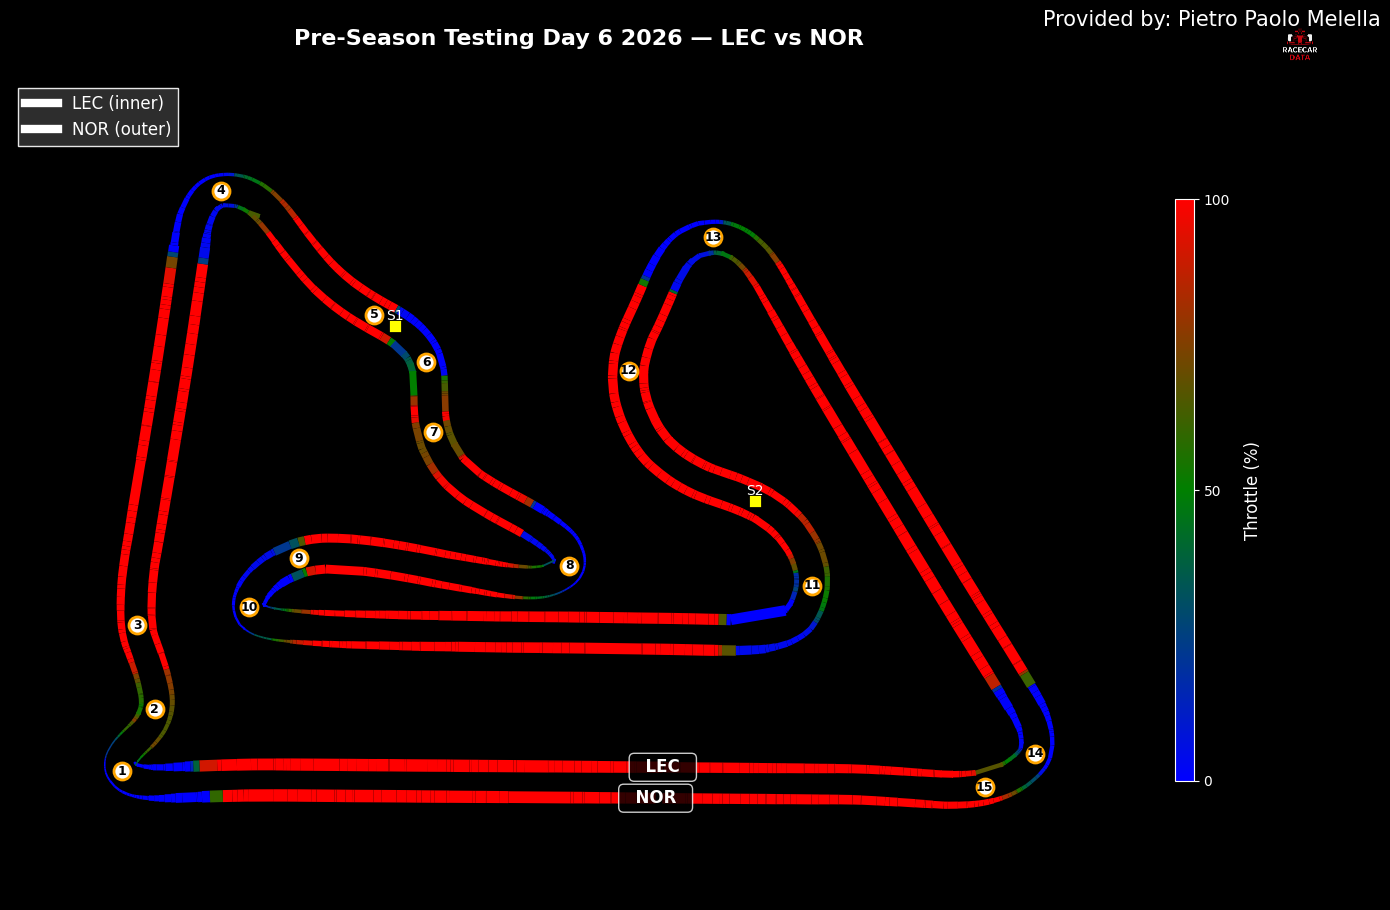

In [13]:
vis = f1a.DualThrottleComparisonVisualizer(
    session=session,
    reference_driver='LEC',
    comparison_driver='NOR',
    offset_distance=200,
    event_name=session_name,
    year=session_year,
    session_name=session_type,
    annotate_sectors=True,
)
vis.plot()

(<Figure size 1400x1000 with 2 Axes>,
 <Axes: title={'center': 'Pre-Season Testing 2026 — Minisector Comparison'}>)

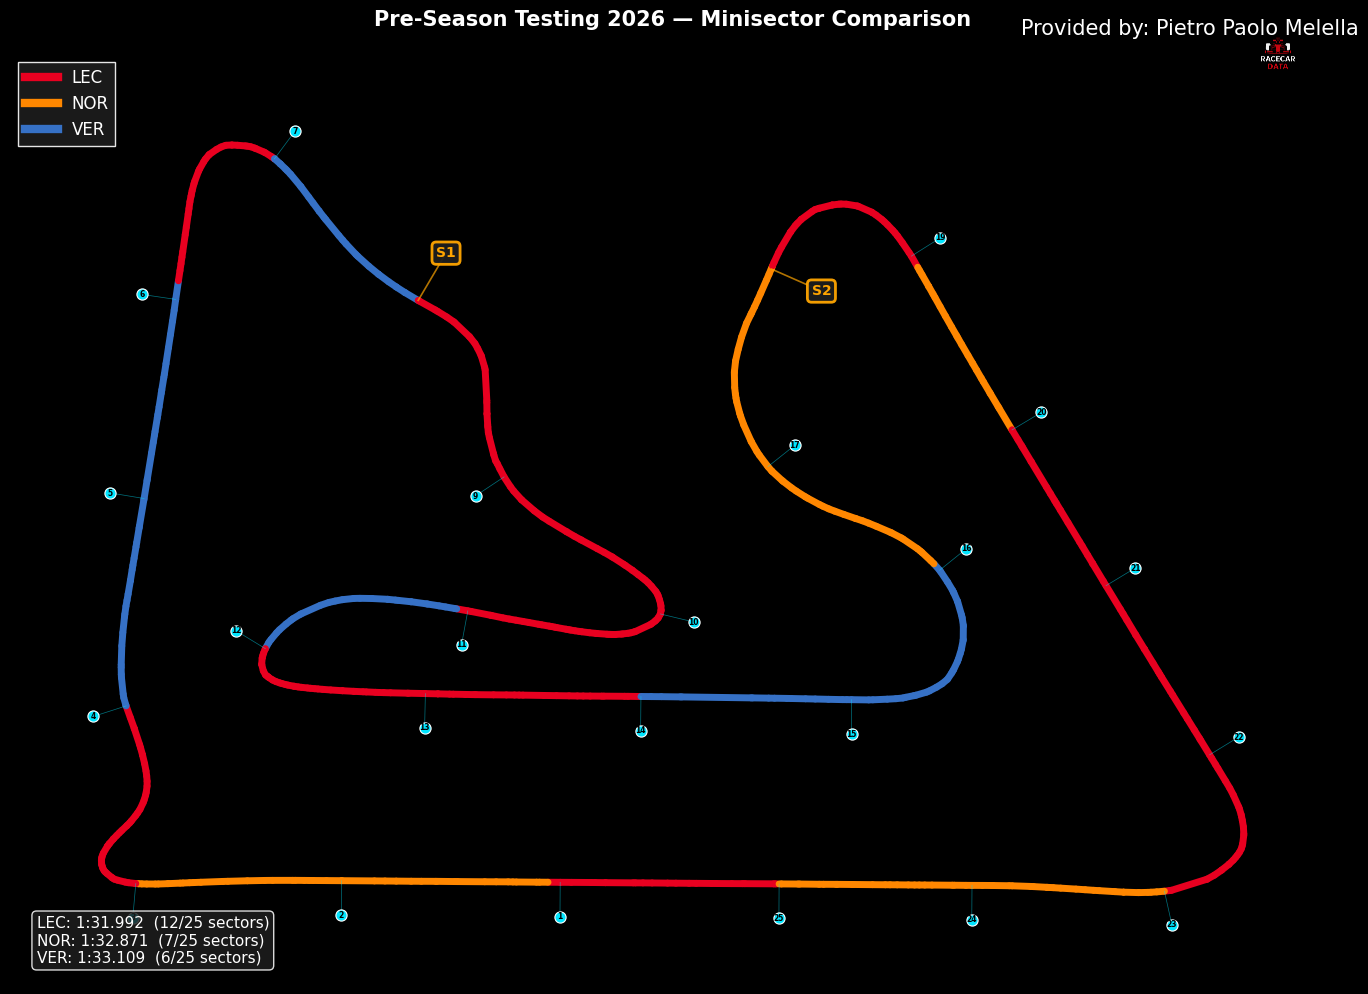

In [14]:
# from f1analytics.minisector import MinisectorComparator

ms = f1a.MinisectorComparator(
    session=session,
    session_name="Pre-Season Testing",
    year=2026,
    session_type="",
    drivers={'LEC': 'fastest', 'NOR': 'fastest', 'VER': 'fastest'},
    n_sectors=25,  # default, but you can change
)

# Track map — circuit colored by fastest driver per segment
ms.plot_track_map()



(<Figure size 1600x700 with 2 Axes>,
 <Axes: title={'center': 'Pre-Season Testing 2026 — Minisector Deltas\nLEC: 1:31.992  |  NOR: 1:32.871  |  VER: 1:33.109'}, xlabel='Mini-sector', ylabel='Time Lost (s)'>)

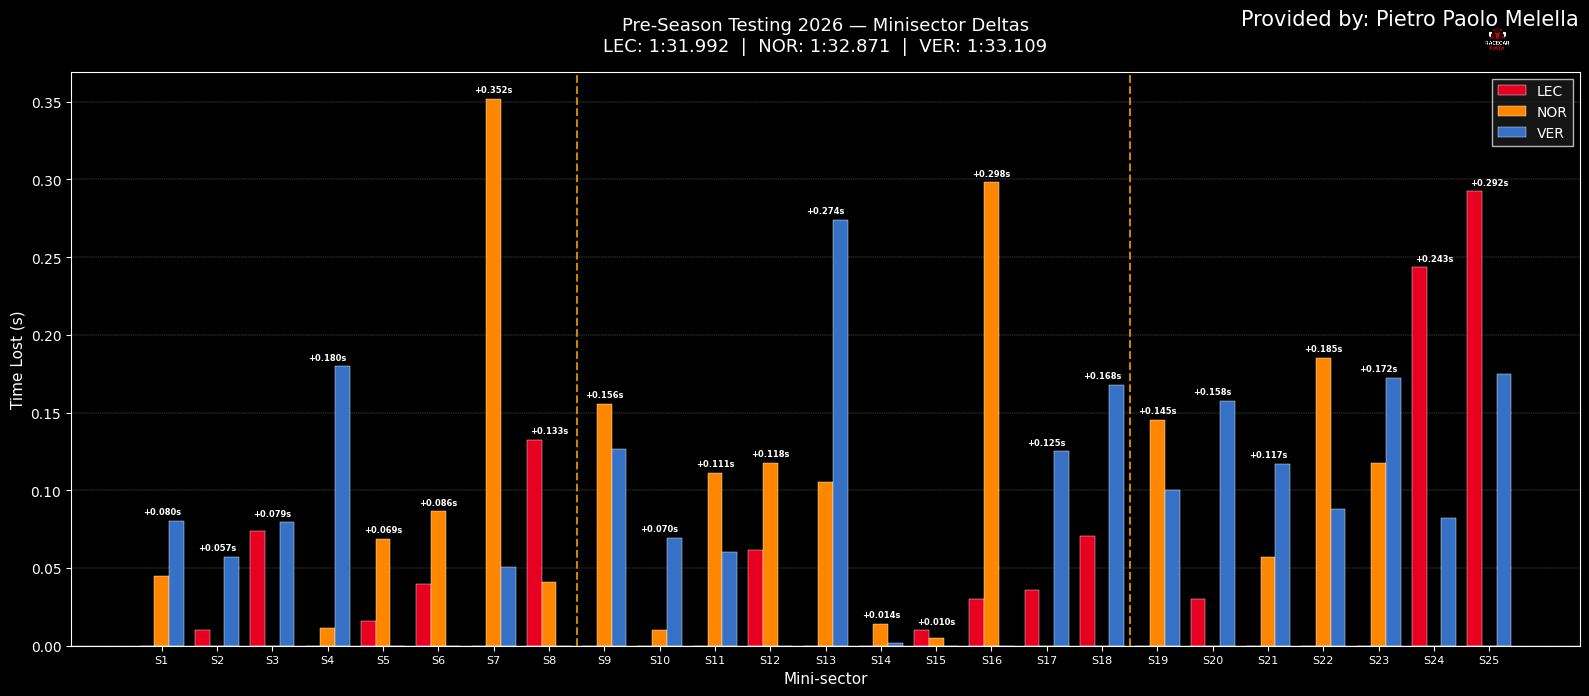

In [15]:
# Bar chart — time deltas per segment
ms.plot_bar_chart()